<a href="https://colab.research.google.com/github/ribeiroalair/repo_airbnb/blob/main/Analisando_os_Dados_do_Airbnb_(Austin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Austin*

O [Airbnb](https://www.airbnb.com.br/) se consagrou na última década como a **maior rede de hoteis do mundo**. A gigante das hospedagens alcançou esse posto com a incrível marca de... **0 hóteis**. Isso, zero. É como se apple não vendesse um iphonezinho. 

Se há alguém precisando de uma hospedagem e outra pessoa com espaço pra disponibilizar, o Airbnb faz o match através de uma abordagem desburocratizada e uma plataforma prática e moderna. Sem filas, nada de trantornos com reservas e infinitas possibilidades. 

No final de 2019, a empresa californiana já havia ultrapassado a marca de  **meio bilhão** de hóspedes ao redor do globo. 

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Austin e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados aqui utilizados encontrados no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise exploratória a seguir será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Agora sim, vamos ao projeto.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/tx/austin/2021-10-14/visualisations/listings.csv")

## Análise dos Dados
Primeiramente será feita uma análise inicial do conjunto de dados para proporcionar consciência acerca da estruturação do dataset.

**Dicionário das variáveis**

* `id` - número único para identificação do imóvel na lista
* `name` - nome da propriedade na listagem
* `host_id` - número de id do proprietário (anfitrião)
* `host_name` - Nome do anfitrião/proprietário
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel/quarto
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias disponíveis dentro de 365 dias
* `license` - número da permissão/registro do imóvel em seu respectivo território


Checaremos a 5 primeiras entradas do nosso *dataset* para começarmos nossas análises.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021-07-02,0.36,3,35,2,NaN
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.21,3,0,0,NaN
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021-09-25,24.16,1,324,39,NaN
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,5.95,1,0,7,NaN
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-04-02,1.27,1,0,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Na sequência, nossa tarefa é descobrir a quantidade de entradas e os tipos de váriáveis.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11269
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade do *dataset* é proporcional a quantidade dos dados ausentes em nossa base.
* Fica claro que as colunas `neighbourhood_group` e `license` possuem 100% dos seus valores em falta.
* Temos ausência de dados em quase 25% das linhas em `reviews_per_month` e `last_review` 
* A variável `host_name` apresenta vazios em menos de 0,5% de seus espaços.


In [ ]:
from numpy.ma.core import shape
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.241548
last_review                       0.241548
host_name                         0.004526
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Um histograma nos ajudará a identificar o tipo de distribuição formada pelas variáveis.


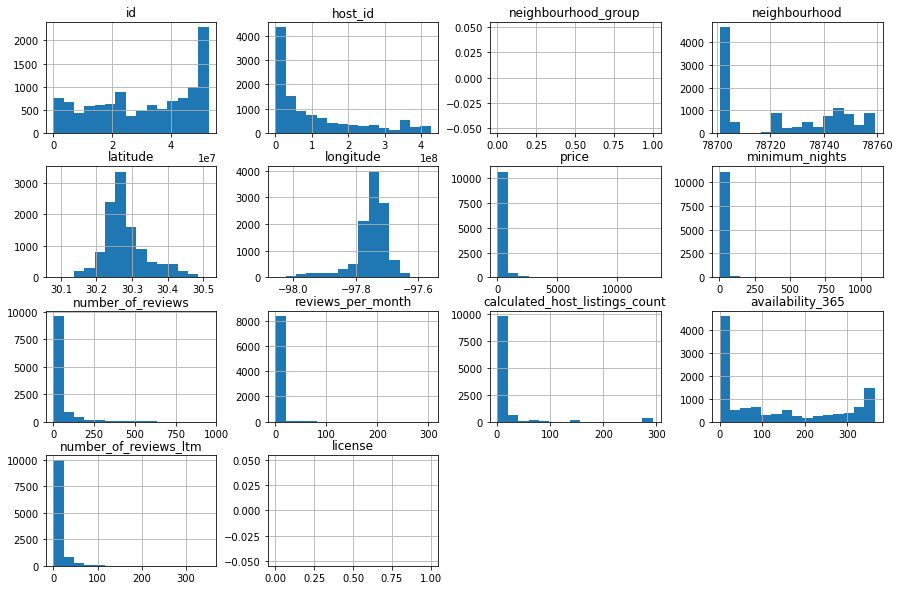

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Na busca por enriquecer nossa análise e obter melhores insights, podemos calcular a média dos preços dos aluguéis através da variável `price`.

In [ ]:
# ver a média da coluna `price``
df.price.mean()

293.5390895376697

### **Q4. Qual a correlação existente entre as variáveis?**
Se encontramos uma relação direta entre duas variáveis, então temos uma correlação.
Através do coeficiente de correlação podemos aferir a intensidade dessa ligação.
Para identificar as correlações existentes entre as variáveis de interesse vamos: 
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.000601,-0.063440,-0.030911,0.037381,0.082610
minimum_nights,-0.000601,1.000000,-0.067321,-0.046708,0.239619,0.161976
number_of_reviews,-0.063440,-0.067321,1.000000,0.310311,-0.083544,0.060331
reviews_per_month,-0.030911,-0.046708,0.310311,1.000000,0.019780,0.088773
calculated_host_listings_count,0.037381,0.239619,-0.083544,0.019780,1.000000,0.351906
availability_365,0.082610,0.161976,0.060331,0.088773,0.351906,1.000000


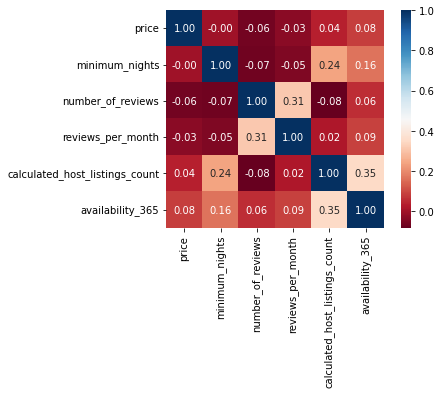

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Em seu "cardápio" o *Airbnb* disponibiliza as opções de casas e apartamentos completos, somente o quarto ou até a divisão do quarto com outros usuários. Encontramos a quantidade de cada possibilidade ao olharmos na coluna da variável `room_type`. 
Se lançarmos mão do método `value_counts()`, podemos estabelecer a quantidade de ocorrências em cada opção de aluguel.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    9086
Private room       2051
Shared room         121
Hotel room           11
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.806283
Private room       0.182004
Shared room        0.010737
Hotel room         0.000976
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Austin?**
Os preços de locação variam de um ponto para outro. Rastrear essa oscilação deixa nossa exploração ainda mais robusta. 
Ao usar `groupby()`, teremos a capacidade de comparar os bairros pelo preço de locação.

In [ ]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
78733    809.584416
78730    807.560976
78732    775.306452
78746    616.958801
78712    500.000000
78737    451.285714
78703    413.053537
78734    390.200000
78739    366.615385
78701    349.459170
Name: price, dtype: float64

Como resultado, fica claro uma disparidade dos bairros 78733, 78730 e 78732 em relação aos demais.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

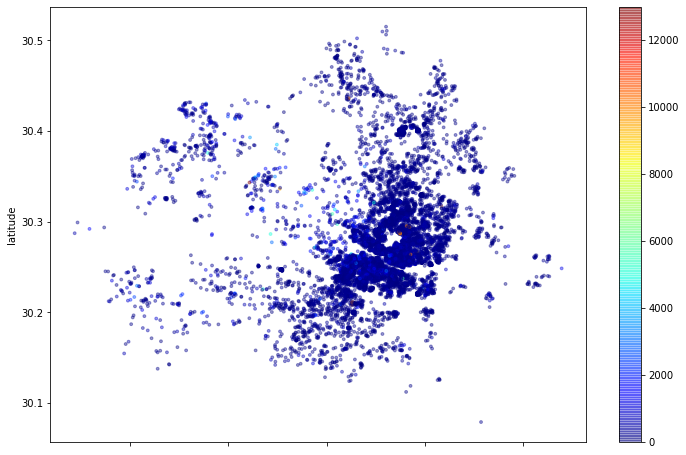

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Caso queira se hospedar por tempo mínimo em Austin, a cidade Texana tem uma média de 8 dias como partida.

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

8.16097257964327

## Conclusões
Foi feita apenas uma análise exploratória em caráter inicial na base de dados do Airbnb.

Rapidamente notou-se a total ausência de dados nas variáveis `neighbourhood_group` e `license`. Uma quantidade tão expressiva de vazios no *dataframe* pode comprometer um horizonte de possibilidades.

Ao plotar os imóveis por latitude e longitude, se observa uma certa aglomeração de imóveis em determinada área enquanto se forma clusters em outras, um dos sintomas da rápida e forte expansão territorial e crescimento populacional de Austin nos últimos anos.

Lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

Por fim, mas igualmente importante... **"Keep Austin Weerd!"**